In [2]:
from torchvision.datasets import OxfordIIITPet
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import torch.nn.functional as F

In [3]:
# Transform to convert PIL image to Tensor
transform = transforms.ToTensor()

trainval_dataset = OxfordIIITPet(
    root='./data/trainval',
    target_types='segmentation',
    transform=transform,
    download=True, 
    split='trainval'
)
test_dataset = OxfordIIITPet(
    root='./data/test',
    target_types='segmentation',
    transform=transform,
    download=True, 
    split='test'
)

In [7]:
print(f"Number of images in trainval split: {len(trainval_dataset)}")
trainval_image, trainval_mask = trainval_dataset[0]
print(f"[trainval] Image shape: {trainval_image.shape}, Mask shape: {trainval_mask.size}")

print(f"Number of images in test split: {len(test_dataset)}")
test_image, test_mask = test_dataset[0]
print(f"[test] Image shape: {test_image.shape}, Mask shape: {test_mask.size}")

Number of images in trainval split: 3680
[trainval] Image shape: torch.Size([3, 500, 394]), Mask shape: (394, 500)
Number of images in test split: 3669
[test] Image shape: torch.Size([3, 225, 300]), Mask shape: (300, 225)


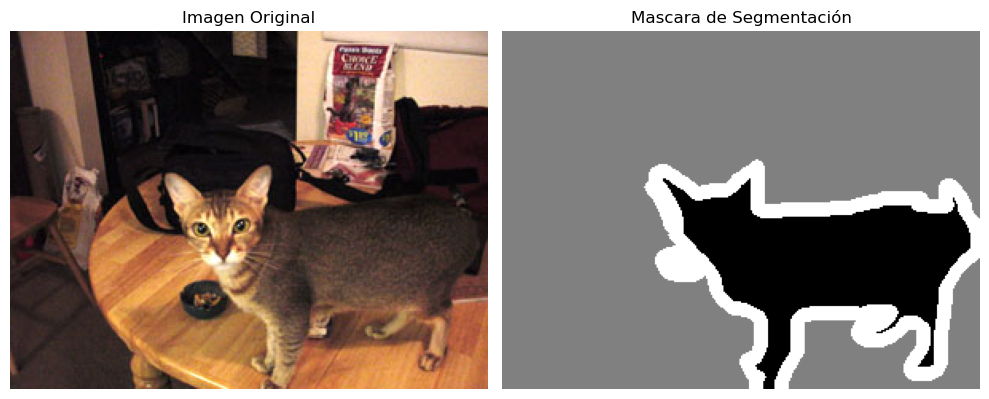

In [9]:
# Convert image tensor (C, H, W) -> (H, W, C) and to NumPy
image_np = test_image.permute(1, 2, 0).numpy()

# Convert mask to NumPy array (from PIL)
mask_np = np.array(test_mask)

# Plot both side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_np)
ax1.set_title("Imagen Original")
ax1.axis('off')

ax2.imshow(mask_np, cmap='gray')
ax2.set_title("Mascara de Segmentación")
ax2.axis('off')

plt.tight_layout()
plt.show()

## 1: Pet
## 2: Border
## 3: Background

In [26]:
np.unique(mask_np) 

array([1, 2, 3], dtype=uint8)

In [63]:
# Add batch dimension
image_m = image.unsqueeze(0)  # shape: (1, 3, H, W)

# Define rectangular patch size (height=16, width=32)
patch_height = 100
patch_width = 100

# Apply unfold with rectangular kernel and stride
patches = F.unfold(image_m, kernel_size=(patch_height, patch_width), stride=(patch_height, patch_width))

# Remove batch dimension
patches = patches.squeeze(0)  # shape: (patch_dim, num_patches)

# Transpose to (num_patches, patch_dim)
patches = patches.transpose(0, 1)

print(patches.shape)  # ✅ (num_patches, patch_dim = 3 * 16 * 16)

torch.Size([15, 30000])


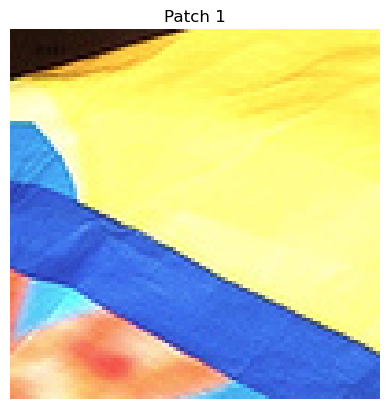

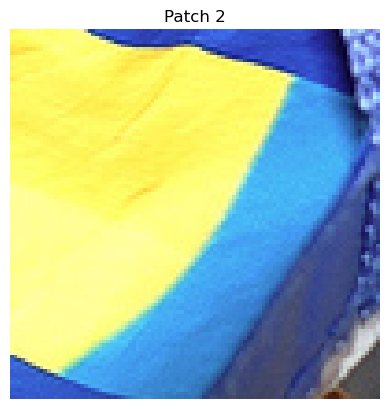

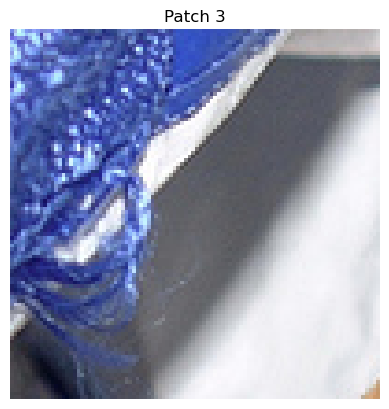

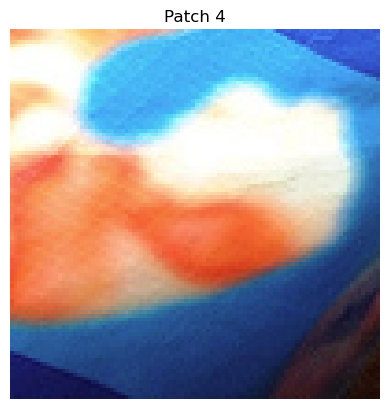

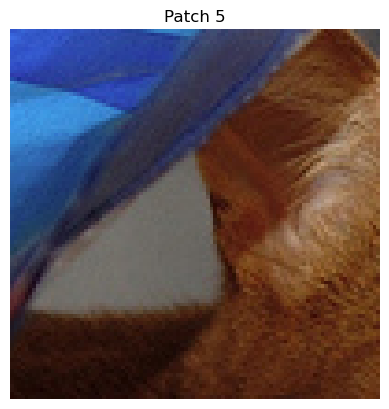

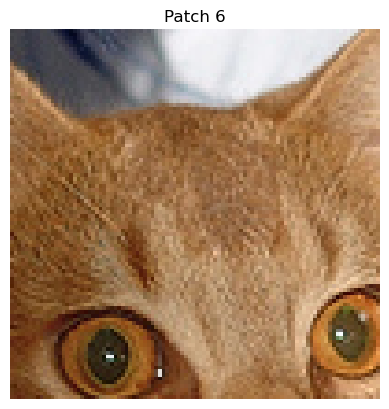

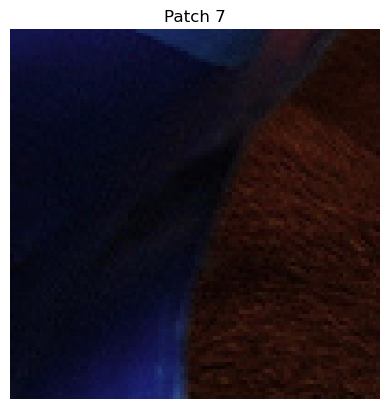

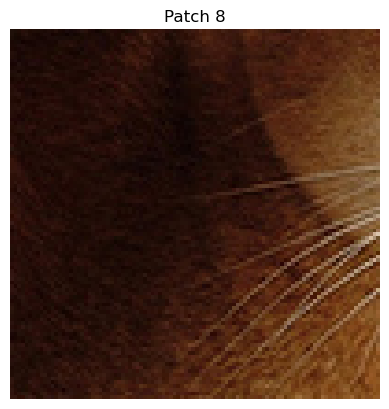

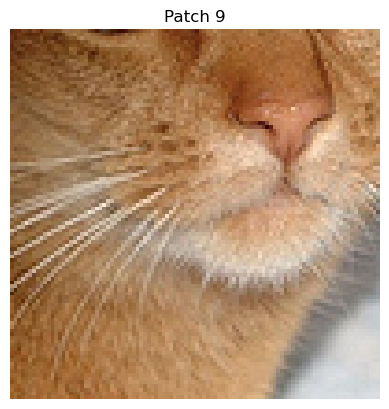

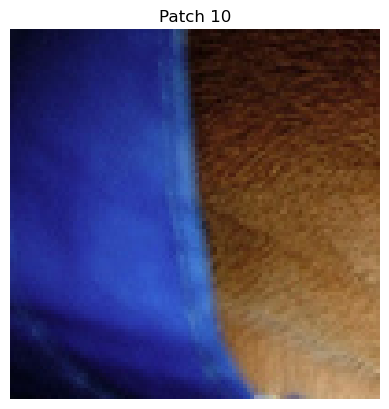

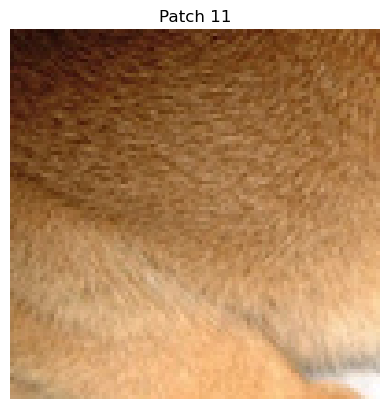

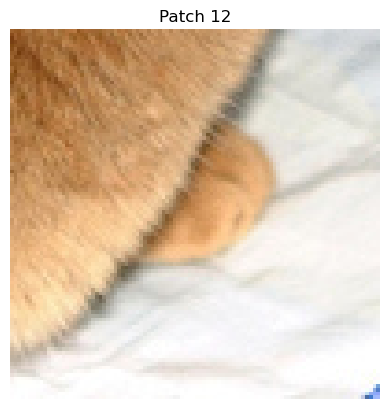

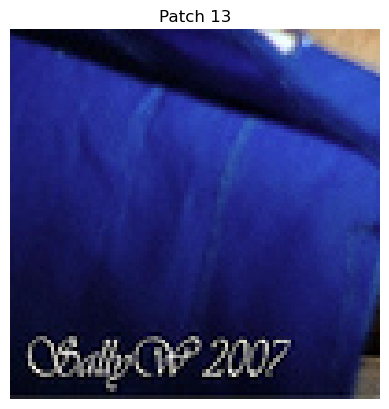

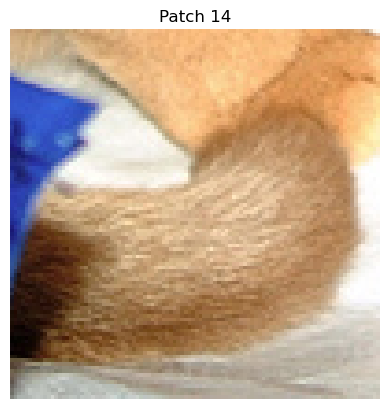

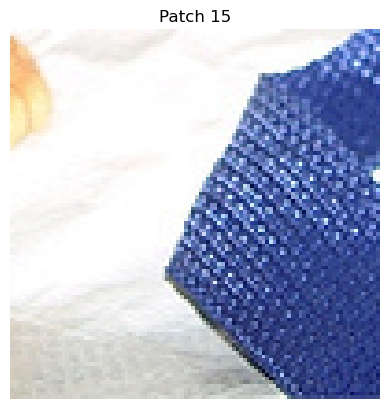

In [64]:
# Reshape each patch and display
num_patches = patches.shape[0]
channels = 3

for i in range(num_patches):
    patch = patches[i].reshape(channels, patch_height, patch_width)
    patch_np = patch.permute(1, 2, 0).numpy()  # (H, W, C)
    
    plt.imshow(patch_np)
    plt.title(f"Patch {i+1}")
    plt.axis('off')
    plt.show()